# Transfer Entropy in Financial Market



by Abhinav Sharma

In [1]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import entropy


In [2]:
# Step 2: Load stock data for Apple and Microsoft from Yahoo Finance
import yfinance as yf

# Define the stock symbols and the date range
apple_symbol = 'AAPL'
microsoft_symbol = 'MSFT'
start_date = '2022-01-01'
end_date = '2023-01-01'

# Download stock data from Yahoo Finance
apple_stock = yf.download(apple_symbol, start=start_date, end=end_date)
microsoft_stock = yf.download(microsoft_symbol, start=start_date, end=end_date)

# Print the first few rows of the data to verify
print("Apple Stock Data:")
display(apple_stock.head())

print("\nMicrosoft Stock Data:")
display(microsoft_stock.head())


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Apple Stock Data:


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.953888,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.669983,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.943985,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.056976,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.225052,86709100



Microsoft Stock Data:


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,335.350006,338.000000,329.779999,334.750000,328.727661,28865100
2022-01-04,334.829987,335.200012,326.119995,329.010010,323.090912,32674300
2022-01-05,325.859985,326.070007,315.980011,316.380005,310.688141,40054300
2022-01-06,313.149994,318.700012,311.489990,313.880005,308.233124,39646100
2022-01-07,314.149994,316.500000,310.089996,314.040009,308.390259,32720000


In [3]:
display(apple_stock.index)

DatetimeIndex(['2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06',
               '2022-01-07', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14',
               ...
               '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
               '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

Columns in Apple Stock Data:
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

Columns in Microsoft Stock Data:
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


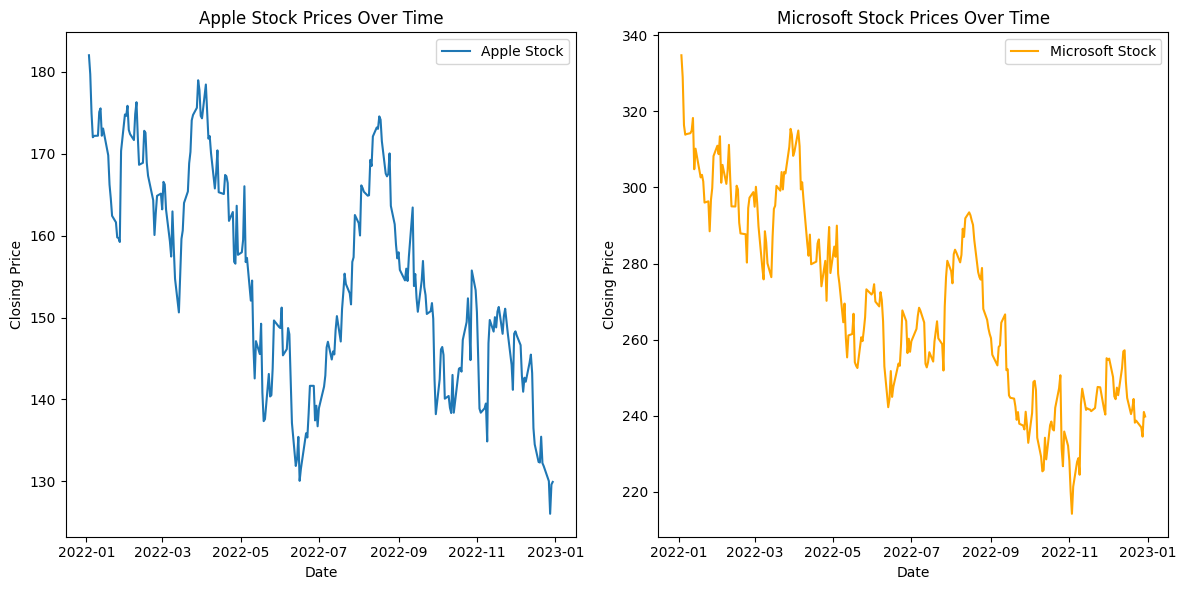

In [4]:
# Checking if the DataFrame is loaded correctly
if not apple_stock.empty and not microsoft_stock.empty:
    # Printing the columns of each DataFrame
    print("Columns in Apple Stock Data:")
    print(apple_stock.columns)

    print("\nColumns in Microsoft Stock Data:")
    print(microsoft_stock.columns)

    # Step 3: Plotting the closing prices over time
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(apple_stock.index, apple_stock['Close'], label='Apple Stock')
    plt.title('Apple Stock Prices Over Time')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(microsoft_stock.index, microsoft_stock['Close'], label='Microsoft Stock', color='orange')
    plt.title('Microsoft Stock Prices Over Time')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()

    plt.tight_layout()
    plt.show()


Columns in Apple Stock Data:
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

Columns in Microsoft Stock Data:
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


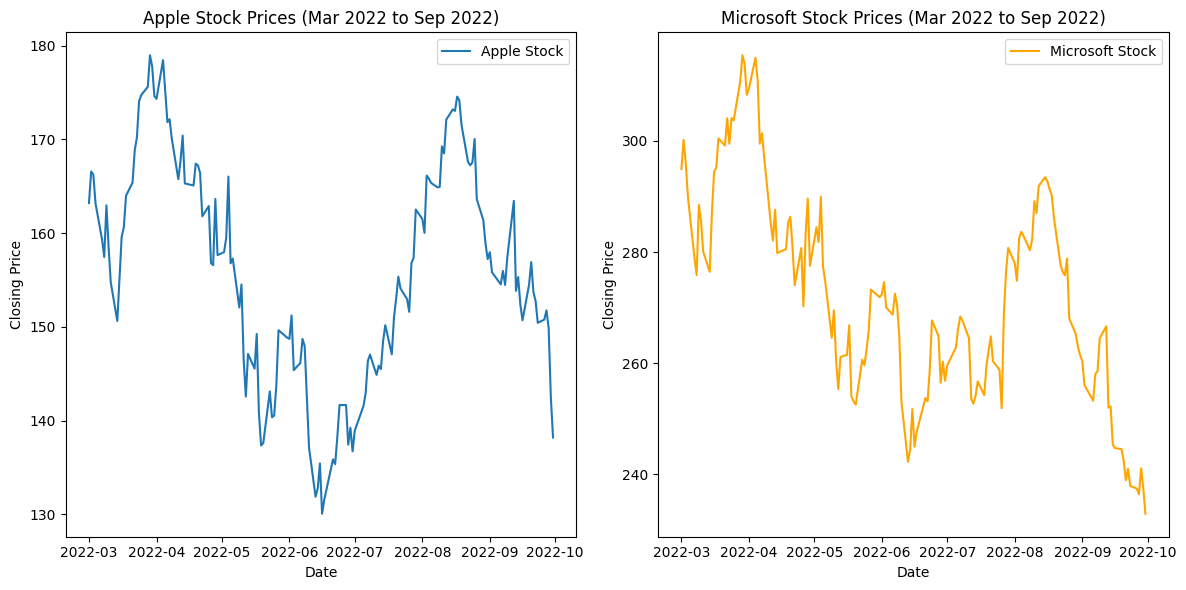

In [5]:
# Checking if the DataFrame is loaded correctly
if not apple_stock.empty and not microsoft_stock.empty:
    # Printing the columns of each DataFrame
    print("Columns in Apple Stock Data:")
    print(apple_stock.columns)

    print("\nColumns in Microsoft Stock Data:")
    print(microsoft_stock.columns)

    # Filter data for the specified time window (March 2022 to September 2022)
    start_date_window = '2022-03-01'
    end_date_window = '2022-09-30'
    
    apple_stock_window = apple_stock[(apple_stock.index >= start_date_window) & (apple_stock.index <= end_date_window)]
    microsoft_stock_window = microsoft_stock[(microsoft_stock.index >= start_date_window) & (microsoft_stock.index <= end_date_window)]

    # Plotting the closing prices over time for the specified window
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(apple_stock_window.index, apple_stock_window['Close'], label='Apple Stock')
    plt.title('Apple Stock Prices (Mar 2022 to Sep 2022)')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(microsoft_stock_window.index, microsoft_stock_window['Close'], label='Microsoft Stock', color='orange')
    plt.title('Microsoft Stock Prices (Mar 2022 to Sep 2022)')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()

    plt.tight_layout()
    plt.show()


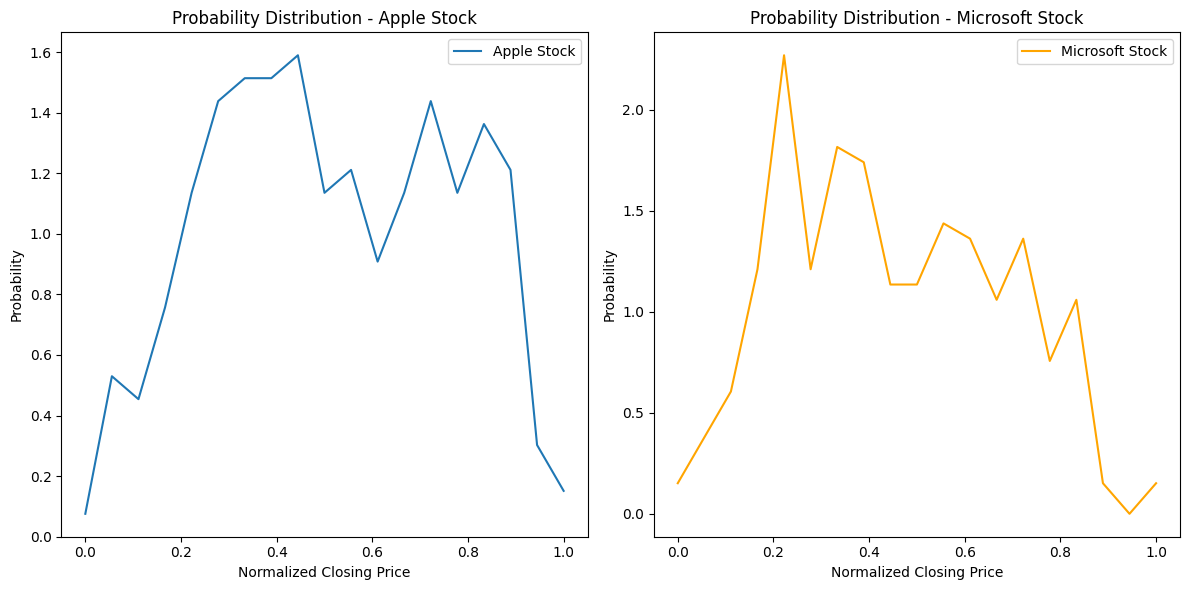

In [6]:
# Step 4: Apply min-max scaling and binning to compute probability distribution
# (Assuming you have a function called min_max_bin_distribution())

def min_max_bin_distribution(data):
    # Replace this with your actual implementation
    # Assume 'data' is a pandas Series
    # Perform min-max scaling
    min_val = data.min()
    max_val = data.max()
    scaled_data = (data - min_val) / (max_val - min_val)

    # Perform binning (you can adjust the number of bins as needed)
    bins = np.linspace(0, 1, 20)
    binned_data, _ = np.histogram(scaled_data, bins=bins, density=True)

    return binned_data

# Apply the function to Apple and Microsoft stock data
apple_prob_distribution = min_max_bin_distribution(apple_stock['Close'])
microsoft_prob_distribution = min_max_bin_distribution(microsoft_stock['Close'])

# Plot the probability distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(np.linspace(0, 1, len(apple_prob_distribution)), apple_prob_distribution, label='Apple Stock')
plt.title('Probability Distribution - Apple Stock')
plt.xlabel('Normalized Closing Price')
plt.ylabel('Probability')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(np.linspace(0, 1, len(microsoft_prob_distribution)), microsoft_prob_distribution, label='Microsoft Stock', color='orange')
plt.title('Probability Distribution - Microsoft Stock')
plt.xlabel('Normalized Closing Price')
plt.ylabel('Probability')
plt.legend()

plt.tight_layout()
plt.show()


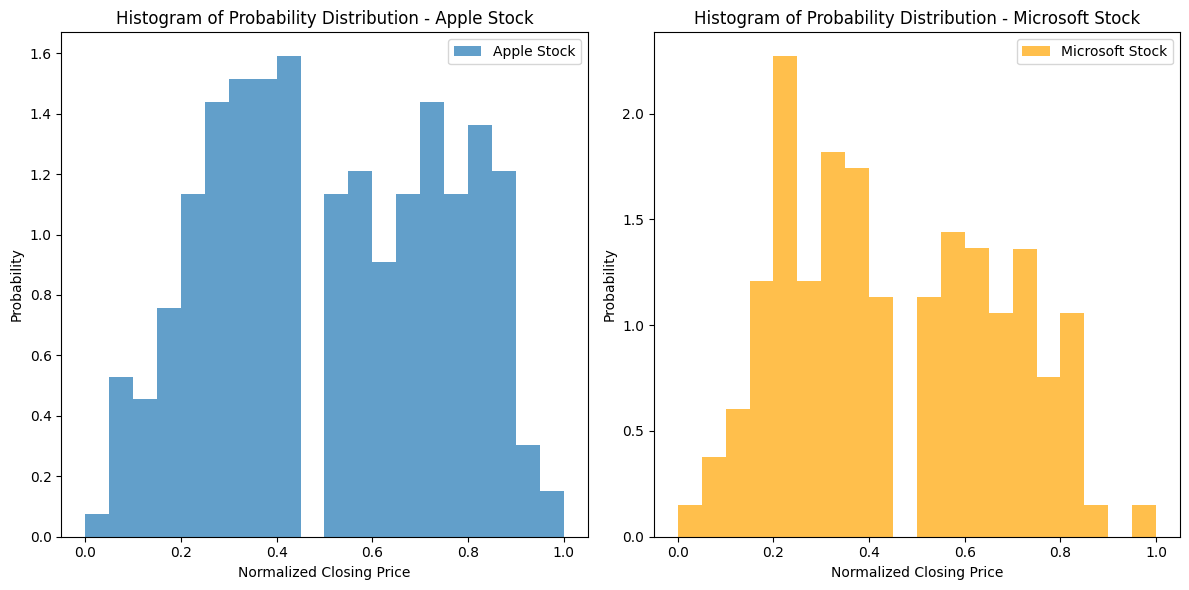

In [7]:
# Plot histograms of the probability distributions
plt.figure(figsize=(12, 6))

# Apple Stock
plt.subplot(1, 2, 1)
plt.hist(np.linspace(0, 1, len(apple_prob_distribution)), bins=20, weights=apple_prob_distribution, label='Apple Stock', alpha=0.7)
plt.title('Histogram of Probability Distribution - Apple Stock')
plt.xlabel('Normalized Closing Price')
plt.ylabel('Probability')
plt.legend()

# Microsoft Stock
plt.subplot(1, 2, 2)
plt.hist(np.linspace(0, 1, len(microsoft_prob_distribution)), bins=20, weights=microsoft_prob_distribution, label='Microsoft Stock', color='orange', alpha=0.7)
plt.title('Histogram of Probability Distribution - Microsoft Stock')
plt.xlabel('Normalized Closing Price')
plt.ylabel('Probability')
plt.legend()

plt.tight_layout()
plt.show()


In [8]:
# Calculate the area under the histograms
area_apple = np.sum(np.diff(np.linspace(0, 1, len(apple_prob_distribution) + 1)) * apple_prob_distribution)
area_microsoft = np.sum(np.diff(np.linspace(0, 1, len(microsoft_prob_distribution) + 1)) * microsoft_prob_distribution)

# Print the results
print(f"Area under the Histogram for Apple Stock: {area_apple}")
print(f"Area under the Histogram for Microsoft Stock: {area_microsoft}")


Area under the Histogram for Apple Stock: 1.0
Area under the Histogram for Microsoft Stock: 0.9999999999999999


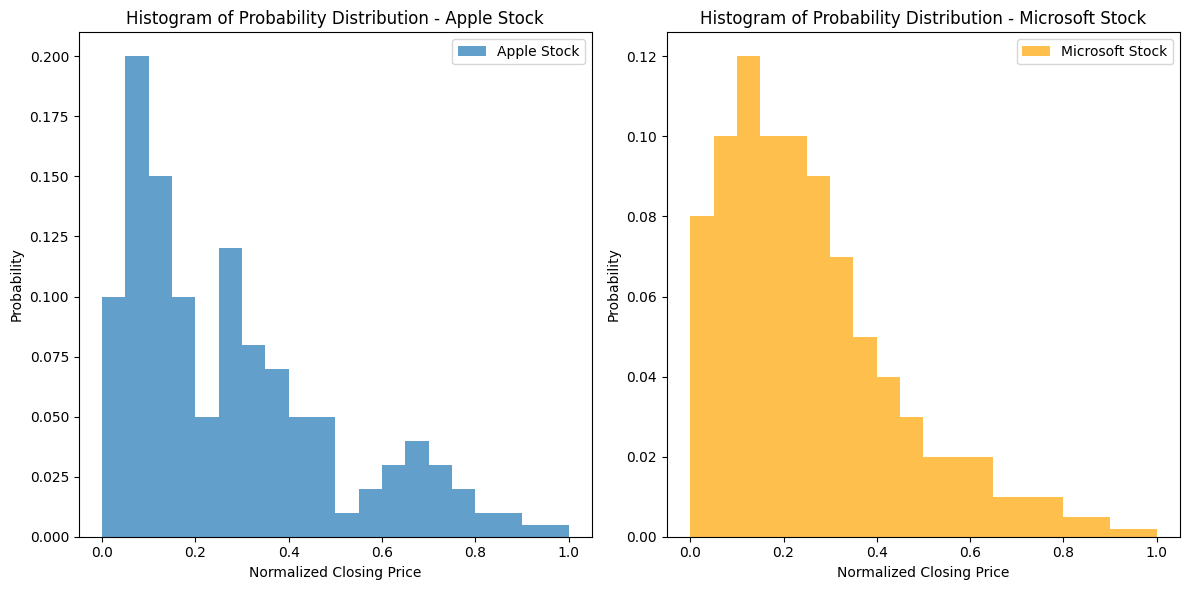

Entropy Terms for Apple Stock: [-0.23025850929940456, -0.3218875824868201, -0.28456799773288216, -0.23025850929940456, -0.14978661367769955, -0.2544316243440109, -0.20205829154466046, -0.18614820258529446, -0.14978661367769955, -0.14978661367769955, -0.04605170185988091, -0.07824046010856292, -0.10519673691959945, -0.128755032994728, -0.10519673691959945, -0.07824046010856292, -0.04605170185988091, -0.04605170185988091, -0.026491586832740183, -0.026491586832740183]
Entropy Terms for Microsoft Stock: [-0.20205829154466046, -0.23025850929940456, -0.2544316243440109, -0.23025850929940456, -0.23025850929940456, -0.21671510477866848, -0.18614820258529446, -0.14978661367769955, -0.128755032994728, -0.10519673691959945, -0.07824046010856292, -0.07824046010856292, -0.07824046010856292, -0.04605170185988091, -0.04605170185988091, -0.04605170185988091, -0.026491586832740183, -0.026491586832740183, -0.012429216196844383, -0.012429216196844383]


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Assume you have the probability distributions for Apple and Microsoft
# Replace these with your actual probability distributions
apple_prob_distribution = np.array([0.1, 0.2, 0.15, 0.1, 0.05, 0.12, 0.08, 0.07, 0.05, 0.05, 0.01, 0.02, 0.03, 0.04, 0.03, 0.02, 0.01, 0.01, 0.005, 0.005])
microsoft_prob_distribution = np.array([0.08, 0.1, 0.12, 0.1, 0.1, 0.09, 0.07, 0.05, 0.04, 0.03, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.005, 0.005, 0.002, 0.002])

# Plot histograms of the probability distributions
plt.figure(figsize=(12, 6))

# Apple Stock
plt.subplot(1, 2, 1)
plt.hist(np.linspace(0, 1, len(apple_prob_distribution)), bins=20, weights=apple_prob_distribution, label='Apple Stock', alpha=0.7)
plt.title('Histogram of Probability Distribution - Apple Stock')
plt.xlabel('Normalized Closing Price')
plt.ylabel('Probability')
plt.legend()

# Microsoft Stock
plt.subplot(1, 2, 2)
plt.hist(np.linspace(0, 1, len(microsoft_prob_distribution)), bins=20, weights=microsoft_prob_distribution, label='Microsoft Stock', color='orange', alpha=0.7)
plt.title('Histogram of Probability Distribution - Microsoft Stock')
plt.xlabel('Normalized Closing Price')
plt.ylabel('Probability')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate p * log(p) for each mini rectangle
def calculate_entropy_terms(prob_distribution):
    entropy_terms = []
    for prob in prob_distribution:
        # Avoid log(0) by skipping terms with probability 0
        if prob > 0:
            entropy_terms.append(prob * np.log(prob))
        else:
            entropy_terms.append(0)  # log(0) is undefined, so we set it to 0
    return entropy_terms

# Calculate entropy terms for Apple and Microsoft
apple_entropy_terms = calculate_entropy_terms(apple_prob_distribution)
microsoft_entropy_terms = calculate_entropy_terms(microsoft_prob_distribution)

# Print the results
print(f"Entropy Terms for Apple Stock: {apple_entropy_terms}")
print(f"Entropy Terms for Microsoft Stock: {microsoft_entropy_terms}")


In [10]:
# Calculate total entropy for Apple and Microsoft
total_entropy_apple = -np.sum(apple_entropy_terms)
total_entropy_microsoft = -np.sum(microsoft_entropy_terms)

# Print the results
print(f"Total Entropy for Apple Stock: {total_entropy_apple}")
print(f"Total Entropy for Microsoft Stock: {total_entropy_microsoft}")


Total Entropy for Apple Stock: 2.8457382646217515
Total Entropy for Microsoft Stock: 2.384585226707376


In [11]:
from scipy.stats import entropy

# Step 5: Calculate self entropy for each stock
# (Assuming you have a function called calculate_entropy())

def calculate_entropy(prob_distribution):
    # Use scipy.stats.entropy to calculate entropy
    return entropy(prob_distribution)

# Calculate self entropy for Apple and Microsoft stocks
apple_entropy = calculate_entropy(apple_prob_distribution)
microsoft_entropy = calculate_entropy(microsoft_prob_distribution)

# Print the results
print(f"Self Entropy for Apple Stock: {apple_entropy}")
print(f"Self Entropy for Microsoft Stock: {microsoft_entropy}")


Self Entropy for Apple Stock: 2.614316955089725
Self Entropy for Microsoft Stock: 2.5741963840032165


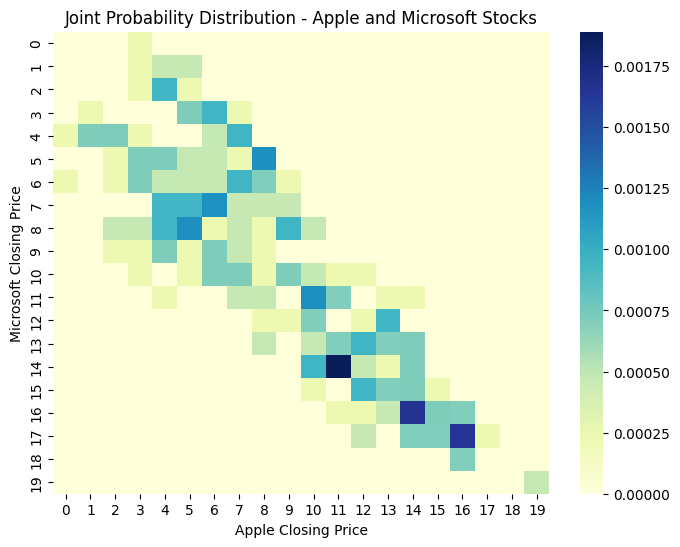

Total Joint Probability: 0.0593 (Not equal to 1)


In [12]:
import numpy as np
import seaborn as sns

# Assuming you have the closing prices for both Apple and Microsoft stocks
# Replace these with your actual data
apple_closing_prices = apple_stock['Close']
microsoft_closing_prices = microsoft_stock['Close']

# Step 6: Compute joint probability distribution for both stocks
def compute_joint_probability(x, y, bins=20):
    # Use np.histogram2d to compute joint probability distribution
    H, x_edges, y_edges = np.histogram2d(x, y, bins=bins, density=True)
    x_centers = (x_edges[:-1] + x_edges[1:]) / 2
    y_centers = (y_edges[:-1] + y_edges[1:]) / 2
    return H, x_centers, y_centers

# Compute joint probability distribution
joint_prob_distribution, x_centers, y_centers = compute_joint_probability(apple_closing_prices, microsoft_closing_prices)

# Plot heatmap of joint probability distribution with 2 digits after the decimal point
plt.figure(figsize=(8, 6))
sns.heatmap(joint_prob_distribution, cmap="YlGnBu")
# xticklabels=np.round(x_centers, 2), yticklabels=np.round(y_centers, 2), annot=True, fmt=".2f"
plt.title('Joint Probability Distribution - Apple and Microsoft Stocks')
plt.xlabel('Apple Closing Price')
plt.ylabel('Microsoft Closing Price')
plt.show()



# Check if the total joint probability is close to 1
total_joint_probability = np.sum(joint_prob_distribution)

if np.isclose(total_joint_probability, 1.0):
    print(f"Total Joint Probability: {total_joint_probability:.4f} (Approximately 1)")
else:
    print(f"Total Joint Probability: {total_joint_probability:.4f} (Not equal to 1)")



Total Joint Probability (Normalized): 1.0000 (Approximately 1)


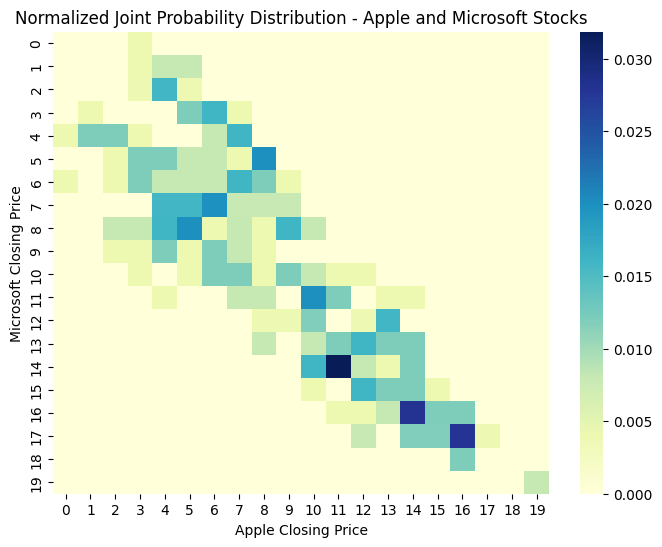

In [13]:
# Normalize the joint probability distribution
normalized_joint_prob_distribution = joint_prob_distribution / np.sum(joint_prob_distribution)

# Check if the total joint probability is close to 1 after normalization
total_joint_probability_normalized = np.sum(normalized_joint_prob_distribution)

if np.isclose(total_joint_probability_normalized, 1.0):
    print(f"Total Joint Probability (Normalized): {total_joint_probability_normalized:.4f} (Approximately 1)")
else:
    print(f"Total Joint Probability (Normalized): {total_joint_probability_normalized:.4f} (Not equal to 1)")

# Plot heatmap of normalized joint probability distribution
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_joint_prob_distribution, annot=False, cmap="YlGnBu")
plt.title('Normalized Joint Probability Distribution - Apple and Microsoft Stocks')
plt.xlabel('Apple Closing Price')
plt.ylabel('Microsoft Closing Price')
plt.show()


In [14]:
# Calculate joint entropy manually
joint_entropy = -np.sum(normalized_joint_prob_distribution * np.log2(normalized_joint_prob_distribution + 1e-10))  # Adding a small constant to avoid log(0)

# Print the result
print(f"Joint Entropy: {joint_entropy:.4f}")


Joint Entropy: 6.4791


In [15]:
# Calculate joint entropy by PYTHON function
from scipy.stats import entropy

# Flatten the 2D array for joint probability distribution
flattened_joint_prob_distribution = normalized_joint_prob_distribution.flatten()

# Calculate joint entropy using scipy.stats.entropy
joint_entropy = entropy(flattened_joint_prob_distribution, base=2)

# Print the result
print(f"Joint Entropy: {joint_entropy:.4f}")


Joint Entropy: 6.4791


In [18]:
import pandas as pd
import numpy as np

# Assuming you have data frames with columns 'Date' and 'Closing_Price' for Apple and Microsoft stocks
# Replace these with your actual data frames
apple_stock = pd.DataFrame({'Date': ['2022-01-01', '2022-01-02', ...], 'Closing_Price': [150.0, 152.0, ...]})
microsoft_stock = pd.DataFrame({'Date': ['2022-01-01', '2022-01-02', ...], 'Closing_Price': [250.0, 248.0, ...]})

# Step 1: Assume a time window (k, l, h) for the joint probability distribution
# For simplicity, let's assume k = l = 1 and h = 1 for a basic example
k = l = h = 1

# Step 2: Extract relevant time series for Apple and Microsoft
apple_series = apple_stock['Closing_Price'].values
microsoft_series = microsoft_stock['Closing_Price'].values

# Step 3: Calculate joint probability distribution (replace this with your actual function)
joint_prob_distribution = calculate_joint_probability(k, l, h, apple_series, microsoft_series)

# Step 4: Calculate self-entropy for Apple given B's past and Self's past
self_entropy_apple_given_kl = -np.sum(joint_prob_distribution * np.log2(joint_prob_distribution))

# Step 5: Calculate self-entropy for Apple given its past
self_entropy_apple_given_k = calculate_self_entropy(k, apple_series)

# Print or use the calculated values
print("Self-Entropy for Apple given B's past and Self's past:", self_entropy_apple_given_kl)
print("Self-Entropy for Apple given its past:", self_entropy_apple_given_k)


NameError: name 'calculate_joint_probability' is not defined

In [19]:
import numpy as np

def calculate_joint_probability(k, l, h, apple_series, microsoft_series):
    num_states = 2**(k + l + 1)
    joint_prob_distribution = np.zeros(num_states)

    for i in range(k + l, len(apple_series) - h):
        apple_past = apple_series[i - k:i]
        microsoft_past = microsoft_series[i - l:i]
        future_state = int(microsoft_series[i + h] > microsoft_series[i])

        state = future_state * (2**k) + sum([apple_past[j] > apple_series[i] for j in range(k)])

        joint_prob_distribution[state] += 1

    joint_prob_distribution /= np.sum(joint_prob_distribution)  # Normalize to obtain probabilities

    return joint_prob_distribution

# Example usage:
k = l = h = 1
apple_series = np.array([150.0, 152.0, 148.0, 155.0, 157.0, 160.0])
microsoft_series = np.array([250.0, 248.0, 255.0, 257.0, 253.0, 260.0])

joint_prob_distribution = calculate_joint_probability(k, l, h, apple_series, microsoft_series)
print("Joint Probability Distribution:", joint_prob_distribution)


Joint Probability Distribution: [0.33333333 0.         0.33333333 0.33333333 0.         0.
 0.         0.        ]
